## Logistic Reg Bayes

베이지안 Logistic regression에 대한 자세한 설명은 `manual/Logistic Regression Bayes.md`를 참고.

### 데이터 불러오기: 모형 시뮬레이션을 위해 임의생성된 데이터셋

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/generated_1000x4.csv")
df

,x1,x2,x3,x4,target
0,-0.785351,-0.882394,-0.591329,-2.455268,0
1,-0.753246,0.890832,0.934414,-0.674267,1
2,-0.802601,1.546045,-1.140014,0.741586,1
3,0.809788,1.692708,-0.038934,-0.516082,1
4,0.923345,-0.689635,-0.866196,1.828143,1
...,...,...,...,...,...
995,-0.789069,-0.041005,-0.730053,-0.349244,1
996,0.504786,-0.573993,0.826255,-0.293239,1
997,-1.357959,-0.921218,1.858536,0.485944,1
998,-0.513078,-0.967890,-0.342858,-0.341923,1


`df`를 `target` 변수와 설명변수 그룹으로 나눈다.

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

`bok_da` 베이지안분석 패키지 `bayes`의 로지스틱모형 모듈(`logistic_model`)에서 `LogisticRegressionBayes` 클래스를 불러온 후, `model` 객체를 생성하고, `fit()` 메서드를 이용해 추정한다.

In [4]:
from bok_da.bayes.logistic_model import LogisticRegressionBayes

model = LogisticRegressionBayes(mcmcsize=5000, thinning = 1, method='adaptiveMCMC', verbose=True)
model.fit(X, y, add_const=True)

> Initializing Model...
  - Method: adaptiveMCMC
  - MCMC size: 5000
  - Number of chains: 1
  - Thinning: 1
  - Prior: weaklyinformative
  - Prior location: []
  - Prior scale: []
  - Prior alpha: 0.001
  - Prior beta: 0.001
  - Jumping rate: 0.1
  - Acceptance rate: 0.234
  - Seed: None
  - Verbose: True
> Start Fitting Model...
  - Input Data: 1000 samples, 5 features
  - Adding constant term to the model
  - Optimization Method: adaptiveMCMC


AdaptiveMCMC Weakly Informative Chain 1: 100%|██████████| 5000/5000 [00:20<00:00, 249.87it/s]


> Model Fitted.


추정결과를 `print_summary()` 메서드를 이용해 출력한다.

In [5]:
model.print_summary(digits=4)

---------------------------------------------------------------
Model Summary:

BIC: 611.7147

---------------------------------------------------------------
Variable      Mean      Var      2.5     97.5      ESS Acc Rate
---------------------------------------------------------------
const      -0.0700   0.0053  -0.2020   0.0745 875.1184   0.2424
x1          0.8240   0.0240   0.5239   1.1252 723.9064   0.2554
x2         -0.9915   0.0239  -1.3013  -0.6990 508.3926   0.2450
x3         -0.0800   0.0190  -0.3598   0.1836 858.4420   0.2466
x4          2.0419   0.0313   1.7012   2.3813 828.8554   0.2514
---------------------------------------------------------------


추정결과를 `traceplot()` 메서드를 이용해 시각화할 수 있다.

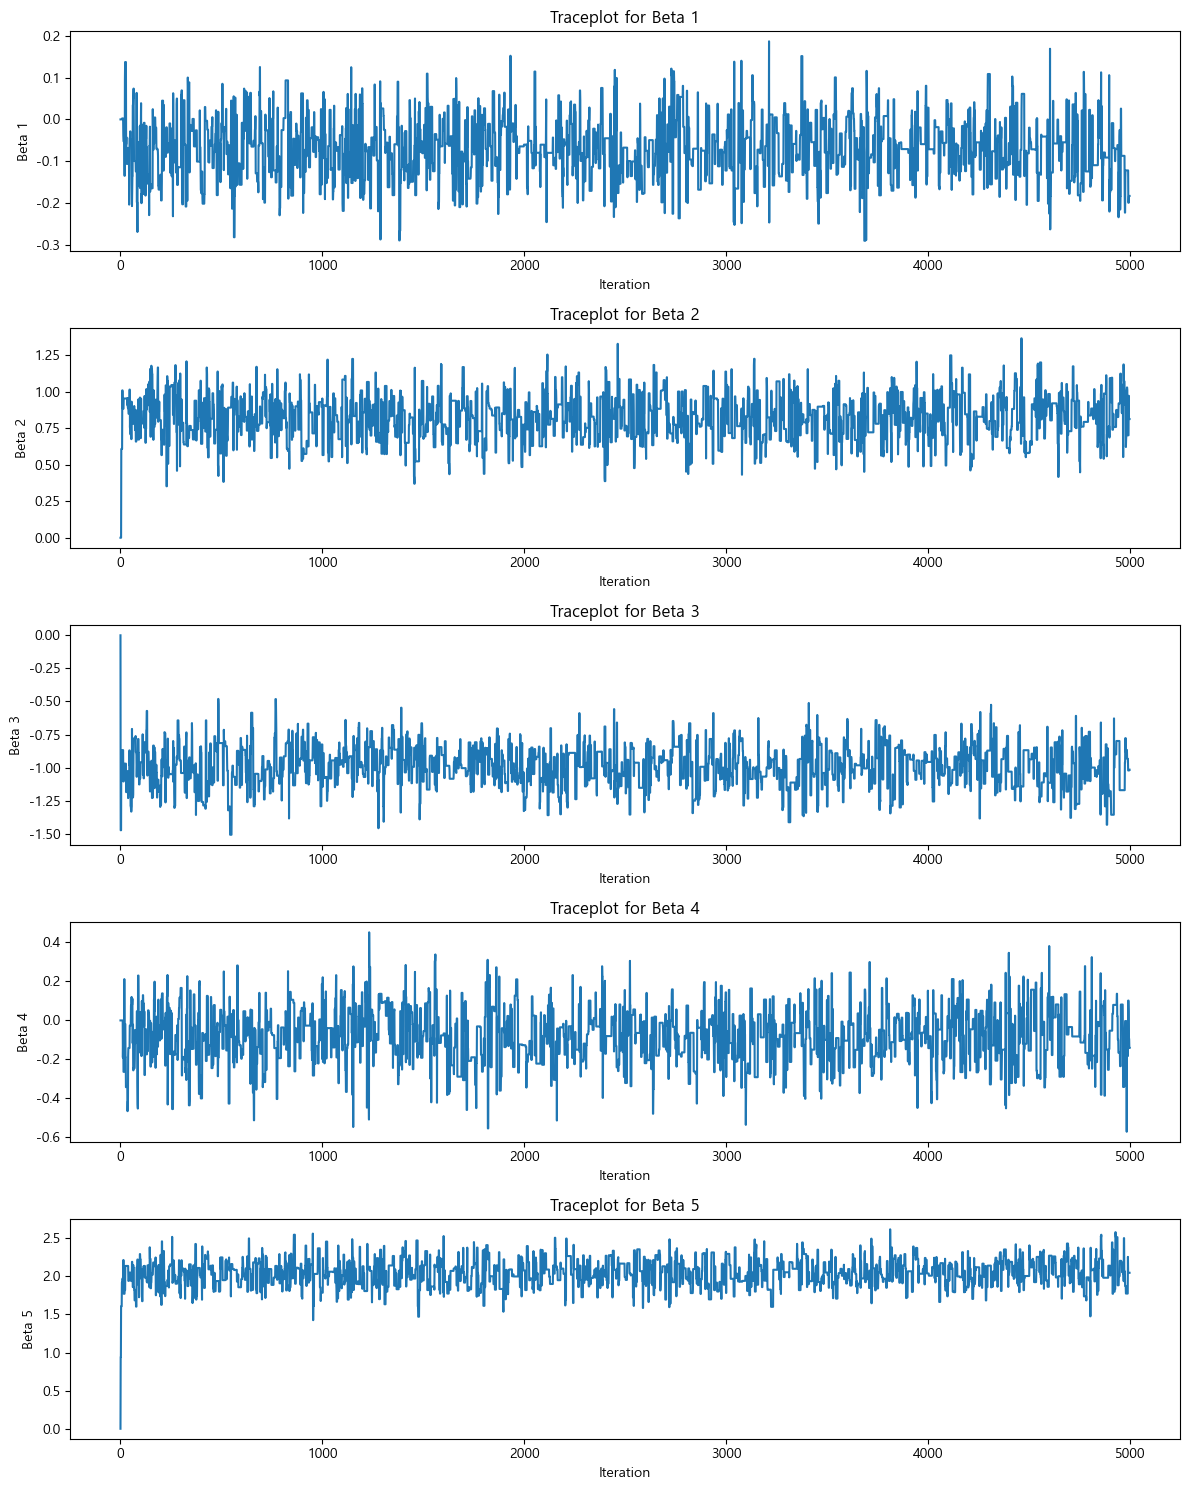

In [6]:
model.traceplot()

`hpd_interval()` 메서드를 이용해 파라미터별 Highest Posterior Density 구간(베이지안 신뢰구간)을 시각화할 수 있다.

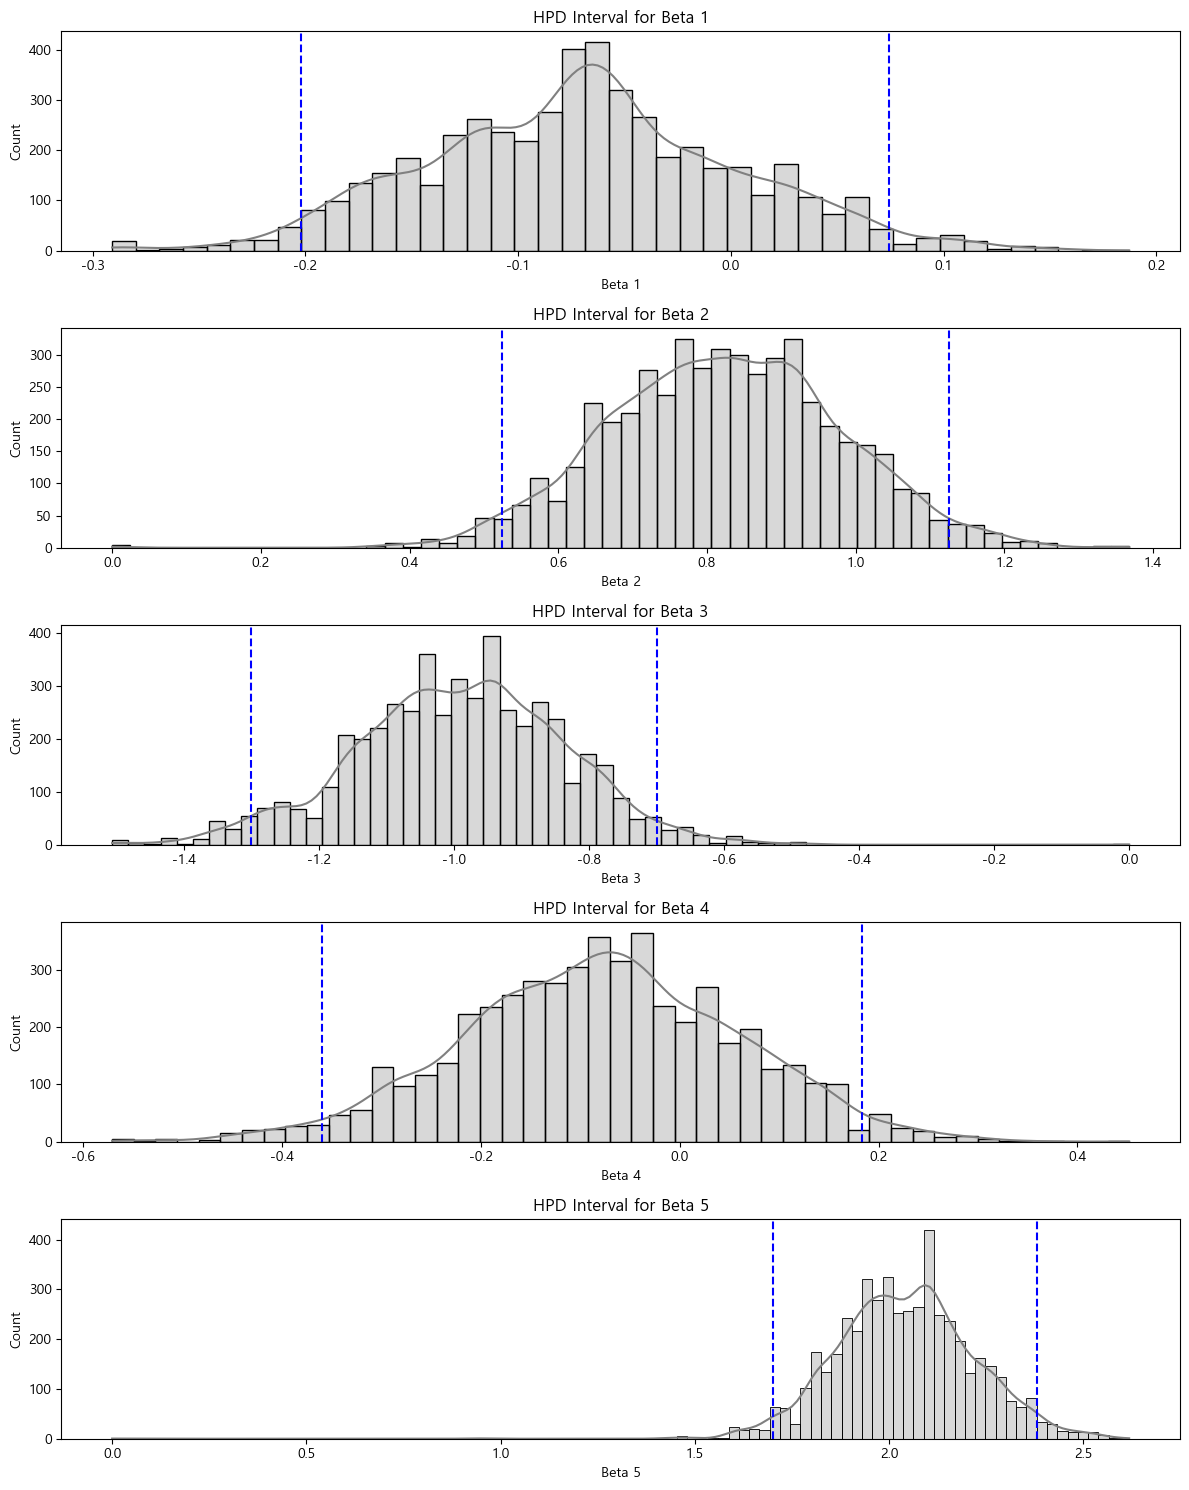

In [7]:
model.hpd_interval()

`acf_plot()` 메서드를 이용해 파라미터별 `acf`(autocorrelation function)를 시각화할 수 있다.

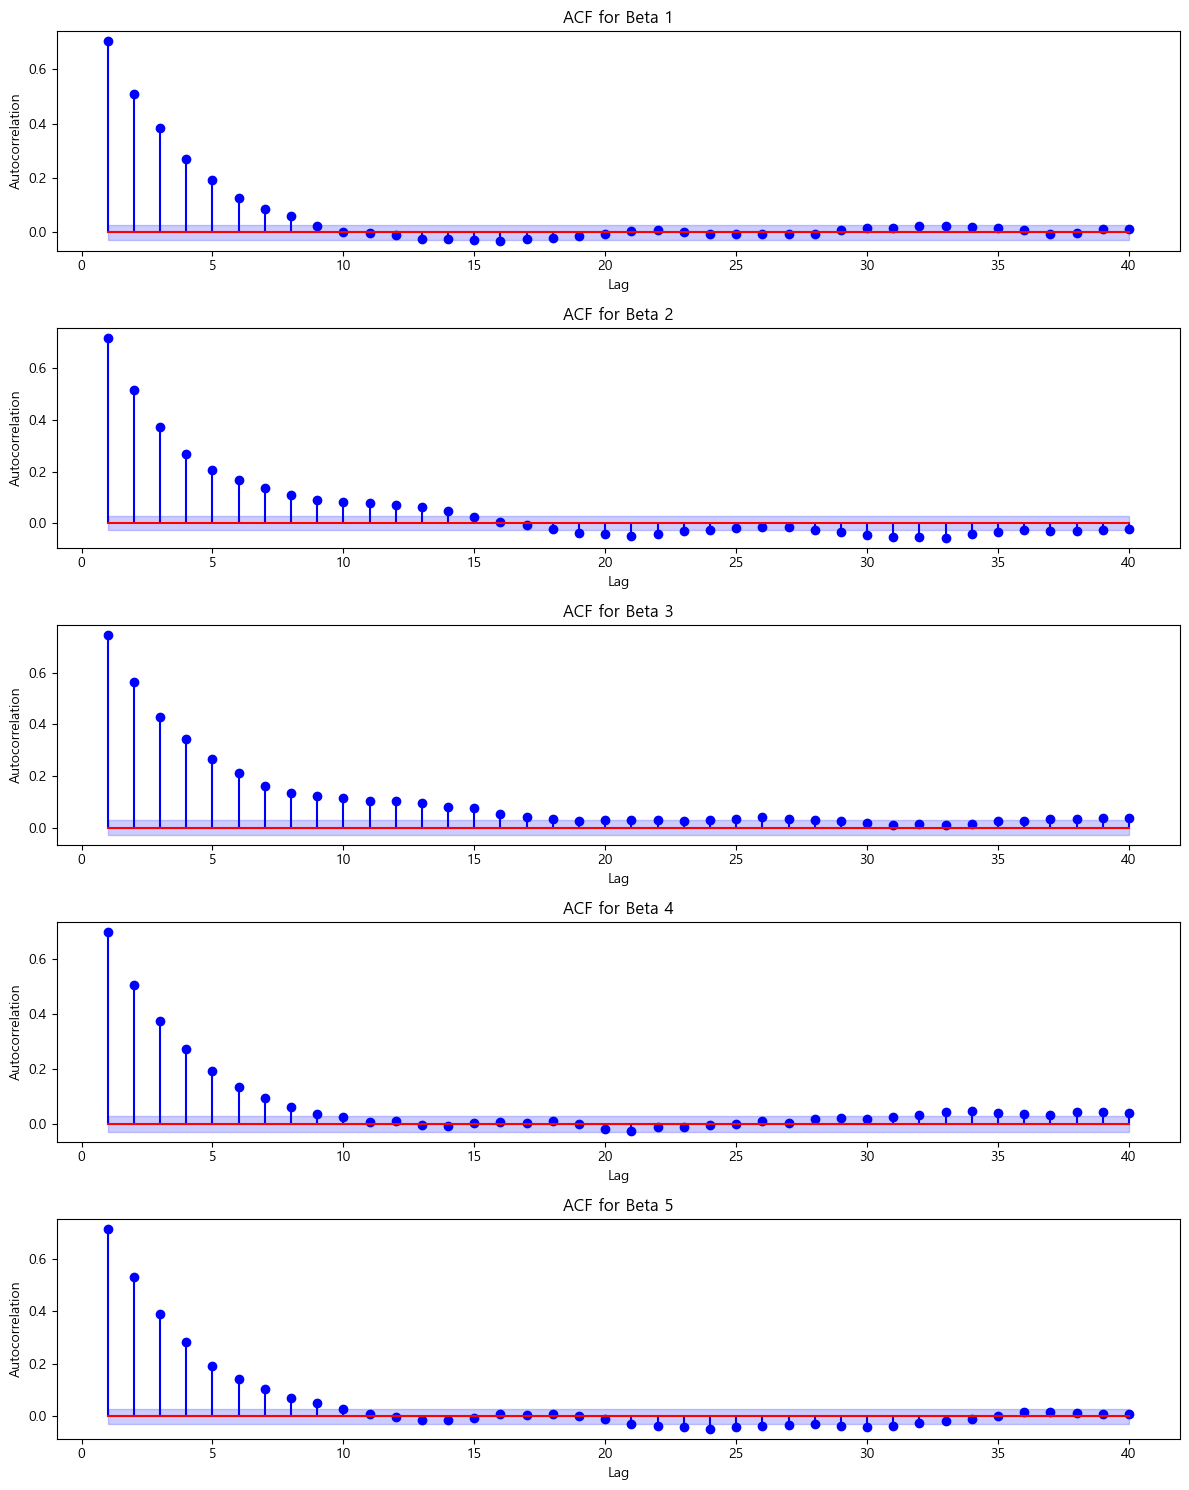

In [8]:
model.acf_plot()